## Exploratory Analysis_Univariate
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv
/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather.csv
/kaggle/input/noaa-weather-data-jfk-airport/README.txt
/kaggle/input/noaa-weather-data-jfk-airport/LICENSE.txt
/kaggle/input/noaa-weather-data-jfk-airport/clean_data.py


### Let's check 1st file: /kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv

In [3]:
df = pd.read_csv('/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv', delimiter=',')
df.dataframeName = 'jfk_weather_cleaned.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 75119 rows and 16 columns


In [4]:
df.head(10)

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.00,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000e+00,0,1,0
1,2010-01-01 02:00:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000e+00,0,1,0
2,2010-01-01 03:00:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000e+00,0,1,0
3,2010-01-01 04:00:00,5.00,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000e+00,0,1,0
4,2010-01-01 05:00:00,5.00,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000e+00,0,1,0
5,2010-01-01 06:00:00,5.00,33.0,32.0,31.0,92.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000e+00,0,1,0
6,2010-01-01 07:00:00,4.00,33.0,33.0,32.0,96.0,0.0,29.94,29.96,0.00,29.96,0.000000,1.000000e+00,0,1,0
7,2010-01-01 08:00:00,1.25,33.0,33.0,32.0,96.0,3.0,29.93,29.95,0.00,29.95,-1.000000,-1.836970e-16,0,1,0
8,2010-01-01 09:00:00,2.50,34.0,33.0,32.0,92.0,3.0,29.92,29.94,0.00,29.94,-0.939693,-3.420200e-01,0,1,0
9,2010-01-01 10:00:00,2.50,35.0,34.0,32.0,89.0,6.0,29.91,29.93,0.00,29.93,-0.939693,-3.420200e-01,0,1,0


In [5]:
df.index = pd.to_datetime(df["DATE"], format='%Y.%m.%d %H:%M:%S')

In [6]:
df.head(5)

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
DATE,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
2010-01-01 02:00:00,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2010-01-01 03:00:00,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
2010-01-01 04:00:00,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
2010-01-01 05:00:00,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [7]:
df_2 = df.drop('DATE', axis = 1)

In [8]:
df_2.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


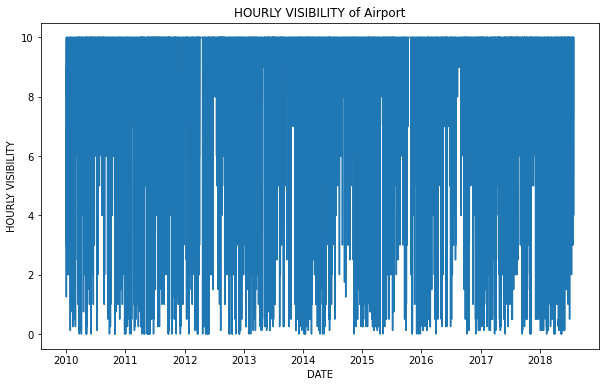

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(df_2['HOURLYVISIBILITY'])
plt.title('HOURLY VISIBILITY of Airport')
plt.ylabel('HOURLY VISIBILITY')
plt.xlabel('DATE')
plt.show()

To see The plot of 60 data

In [10]:
temp = df_2[:60]

In [11]:
temp.count()

HOURLYVISIBILITY              60
HOURLYDRYBULBTEMPF            60
HOURLYWETBULBTEMPF            60
HOURLYDewPointTempF           60
HOURLYRelativeHumidity        60
HOURLYWindSpeed               60
HOURLYStationPressure         60
HOURLYSeaLevelPressure        60
HOURLYPrecip                  60
HOURLYAltimeterSetting        60
HOURLYWindDirectionSin        60
HOURLYWindDirectionCos        60
HOURLYPressureTendencyIncr    60
HOURLYPressureTendencyDecr    60
HOURLYPressureTendencyCons    60
dtype: int64

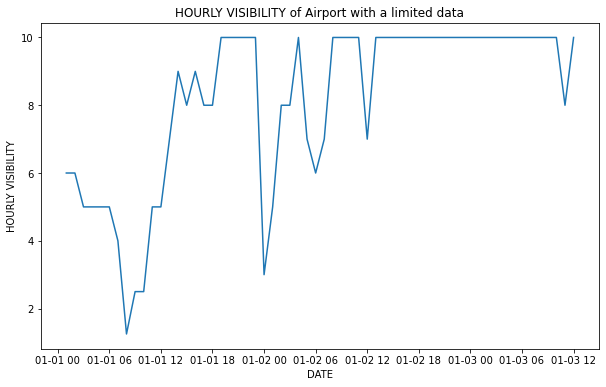

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(temp['HOURLYVISIBILITY'])
plt.title('HOURLY VISIBILITY of Airport with a limited data')
plt.ylabel('HOURLY VISIBILITY')
plt.xlabel('DATE')
plt.show()

In [13]:
data = df[['DATE','HOURLYVISIBILITY']]

In [14]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [15]:
n_steps = 3
X, Y = split_sequence(data['HOURLYVISIBILITY'].tolist(), n_steps)

In [16]:
for i in range(10):
    print(X[i], Y[i])

[6. 6. 5.] 5.0
[6. 5. 5.] 5.0
[5. 5. 5.] 5.0
[5. 5. 5.] 4.0
[5. 5. 4.] 1.25
[5.   4.   1.25] 2.5
[4.   1.25 2.5 ] 2.5
[1.25 2.5  2.5 ] 5.0
[2.5 2.5 5. ] 5.0
[2.5 5.  5. ] 7.0


In [17]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [18]:
X.shape

(75116, 3, 1)

In [19]:
Y.shape

(75116,)

In [20]:
X_train1, y_train1 = X[:70000], Y[:70000]
X_val1, y_val1 = X[70000:73000], Y[70000:73000]
X_test1, y_test1 = X[73000:], Y[73000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((70000, 3, 1), (70000,), (3000, 3, 1), (3000,), (2116, 3, 1), (2116,))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [22]:
model3 = Sequential()
model3.add(InputLayer((3, 1)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [23]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [24]:
History_3 = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=300, callbacks=[cp3])

Epoch 1/300
2188/2188 [==============================] - 11s 5ms/step - loss: 19.8864 - root_mean_squared_error: 4.4594 - val_loss: 1.8138 - val_root_mean_squared_error: 1.3468
Epoch 2/300
2188/2188 [==============================] - 12s 5ms/step - loss: 1.3367 - root_mean_squared_error: 1.1561 - val_loss: 1.2538 - val_root_mean_squared_error: 1.1197
Epoch 3/300
2188/2188 [==============================] - 12s 5ms/step - loss: 1.2063 - root_mean_squared_error: 1.0983 - val_loss: 1.2012 - val_root_mean_squared_error: 1.0960
Epoch 4/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.1859 - root_mean_squared_error: 1.0890 - val_loss: 1.1943 - val_root_mean_squared_error: 1.0928
Epoch 5/300
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1692 - root_mean_squared_error: 1.0813 - val_loss: 1.1968 - val_root_mean_squared_error: 1.0940
Epoch 6/300
2188/2188 [==============================] - 11s 5ms/step - loss: 1.1577 - root_mean_squared_error: 1.0759 -

In [25]:
History_3.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

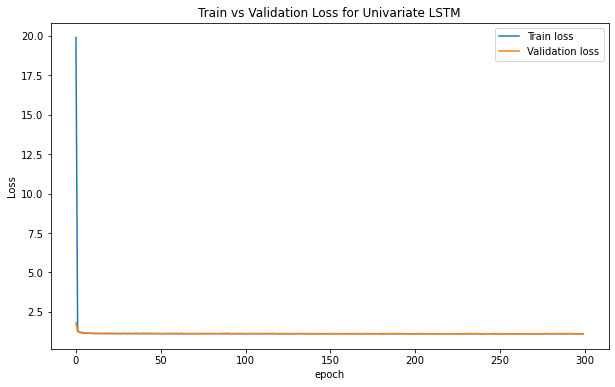

In [26]:
plt.figure(figsize = (10, 6))
plt.plot(History_3.history['loss'])
plt.plot(History_3.history['val_loss'])
plt.title('Train vs Validation Loss for Univariate LSTM')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [27]:
from tensorflow.keras.models import load_model
model3 = load_model('model3/')

In [28]:
train_predictions_1 = model3.predict(X_train1).flatten()
train_results_1 = pd.DataFrame(data={'Train Predictions':train_predictions_1, 'Actuals':y_train1})
train_results_1.head(10)

,Train Predictions,Actuals
0,5.024975,5.00
1,5.095970,5.00
2,5.059266,5.00
3,5.059266,4.00
4,4.191221,1.25
5,1.950192,2.50
6,3.656052,2.50
7,3.543867,5.00
8,5.942211,5.00
9,5.728166,7.00


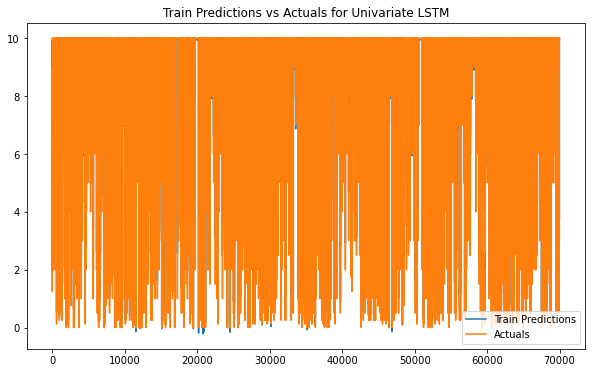

In [29]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_1['Train Predictions'])
plt.plot(train_results_1['Actuals'])
plt.title('Train Predictions vs Actuals for Univariate LSTM')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [30]:
rms = sqrt(mean_squared_error(y_train1, train_predictions_1))
rms

1.0561231898963759

To see limited train results

In [31]:
train_results_minimize = train_results_1[100:300]

In [32]:
train_results_minimize.shape

(200, 2)

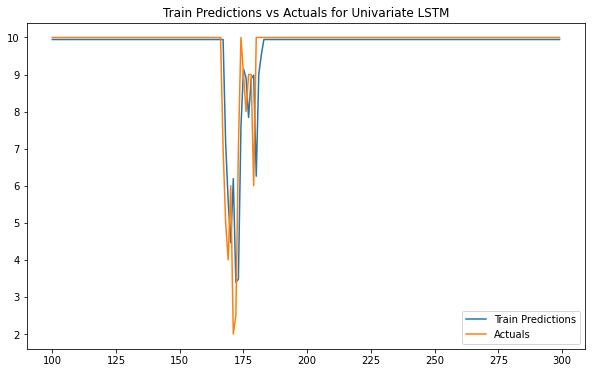

In [33]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_minimize['Train Predictions'])
plt.plot(train_results_minimize['Actuals'])
plt.title('Train Predictions vs Actuals for Univariate LSTM')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [34]:
val_predictions_1 = model3.predict(X_val1).flatten()
val_results_1 = pd.DataFrame(data={'Val Predictions':val_predictions_1, 'Actuals':y_val1})
val_results_1.head(10)

,Val Predictions,Actuals
0,9.944838,10.0
1,9.944838,10.0
2,9.944838,10.0
3,9.944838,10.0
4,9.944838,10.0
5,9.944838,10.0
6,9.944838,10.0
7,9.944838,10.0
8,9.944838,10.0
9,9.944838,10.0


In [35]:
val_results_1.shape

(3000, 2)

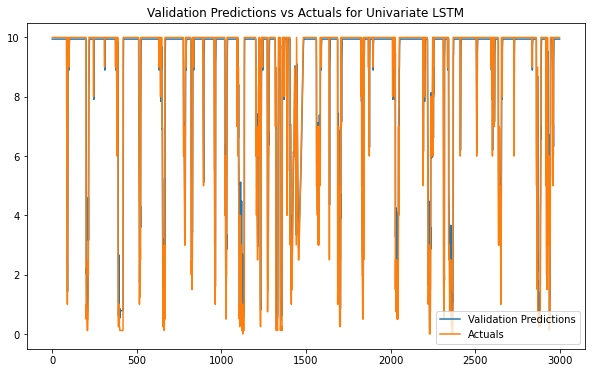

In [36]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_1['Val Predictions'])
plt.plot(val_results_1['Actuals'])
plt.title('Validation Predictions vs Actuals for Univariate LSTM')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [37]:
rms = sqrt(mean_squared_error(y_val1, val_predictions_1))
rms

1.0490322558292142

To see limited validation data:

In [38]:
val_results_minimize = val_results_1[100:300]

In [39]:
val_results_minimize.shape

(200, 2)

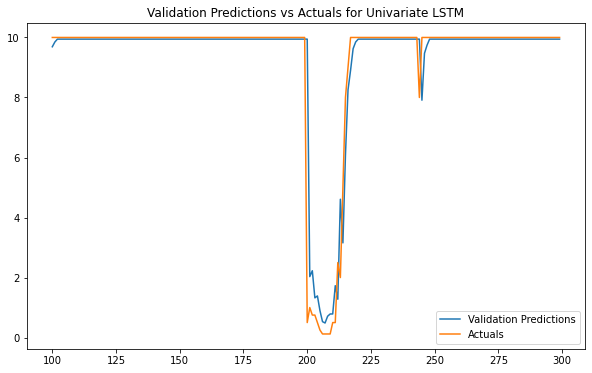

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_minimize['Val Predictions'])
plt.plot(val_results_minimize['Actuals'])
plt.title('Validation Predictions vs Actuals for Univariate LSTM')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [41]:
test_predictions_1 = model3.predict(X_test1).flatten()
test_results_1 = pd.DataFrame(data={'Test Predictions':test_predictions_1, 'Actuals':y_test1})
test_results_1.head(10)

,Test Predictions,Actuals
0,9.944838,10.0
1,9.944838,10.0
2,9.944838,10.0
3,9.944838,10.0
4,9.944838,10.0
5,9.944838,10.0
6,9.944838,10.0
7,9.944838,10.0
8,9.944838,10.0
9,9.944838,10.0


In [42]:
test_results_1.shape

(2116, 2)

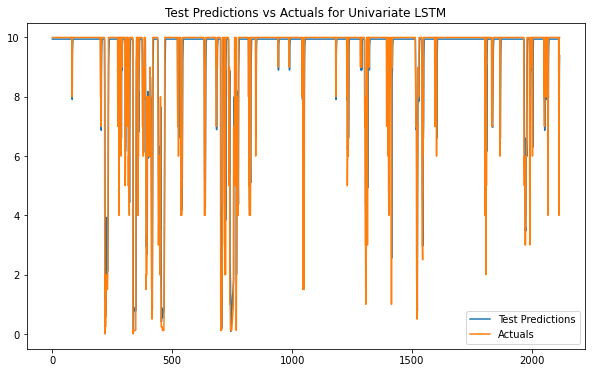

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_1['Test Predictions'])
plt.plot(test_results_1['Actuals'])
plt.title('Test Predictions vs Actuals for Univariate LSTM')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [44]:
rms = sqrt(mean_squared_error(y_test1, test_predictions_1))
rms

1.1654473338572082

To see limited test results

In [45]:
test_results_minimize = test_results_1[100:300]

In [46]:
test_results_minimize.shape

(200, 2)

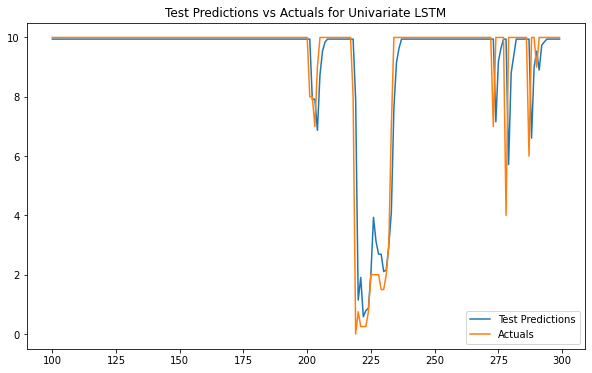

In [47]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_minimize['Test Predictions'])
plt.plot(test_results_minimize['Actuals'])
plt.title('Test Predictions vs Actuals for Univariate LSTM')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [48]:
model4 = Sequential()
model4.add(InputLayer((3, 1)))
model4.add(GRU(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [50]:
History_4 = model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=300, callbacks=[cp4])

Epoch 1/300
2188/2188 [==============================] - 12s 6ms/step - loss: 14.4451 - root_mean_squared_error: 3.8007 - val_loss: 1.2886 - val_root_mean_squared_error: 1.1352
Epoch 2/300
2188/2188 [==============================] - 12s 6ms/step - loss: 1.2047 - root_mean_squared_error: 1.0976 - val_loss: 1.1718 - val_root_mean_squared_error: 1.0825
Epoch 3/300
2188/2188 [==============================] - 12s 5ms/step - loss: 1.1676 - root_mean_squared_error: 1.0806 - val_loss: 1.1614 - val_root_mean_squared_error: 1.0777
Epoch 4/300
2188/2188 [==============================] - 12s 6ms/step - loss: 1.1533 - root_mean_squared_error: 1.0739 - val_loss: 1.1461 - val_root_mean_squared_error: 1.0706
Epoch 5/300
2188/2188 [==============================] - 8s 3ms/step - loss: 1.1463 - root_mean_squared_error: 1.0706 - val_loss: 1.1477 - val_root_mean_squared_error: 1.0713
Epoch 6/300
2188/2188 [==============================] - 12s 5ms/step - loss: 1.1417 - root_mean_squared_error: 1.0685 -

In [51]:
History_4.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

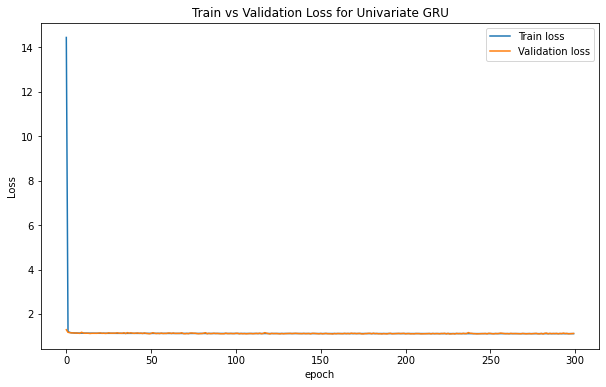

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(History_4.history['loss'])
plt.plot(History_4.history['val_loss'])
plt.title('Train vs Validation Loss for Univariate GRU')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [53]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

In [54]:
train_predictions_2 = model4.predict(X_train1).flatten()
train_results_2 = pd.DataFrame(data={'Train Predictions':train_predictions_2, 'Actuals':y_train1})
train_results_2.head(10)

,Train Predictions,Actuals
0,4.800577,5.00
1,4.977690,5.00
2,4.915288,5.00
3,4.915288,4.00
4,4.012051,1.25
5,1.998159,2.50
6,3.629688,2.50
7,3.570085,5.00
8,5.651021,5.00
9,5.517552,7.00


In [55]:
train_results_2.shape

(70000, 2)

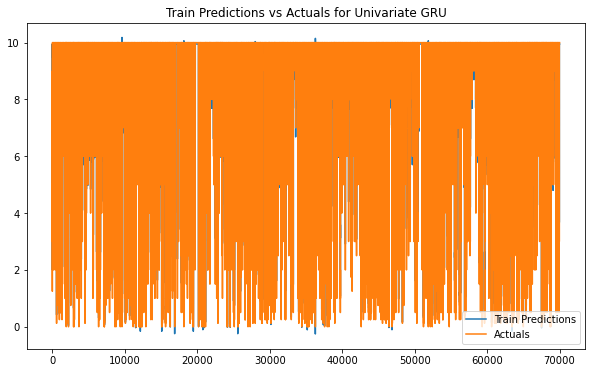

In [56]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_2['Train Predictions'])
plt.plot(train_results_2['Actuals'])
plt.title('Train Predictions vs Actuals for Univariate GRU')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [57]:
rms = sqrt(mean_squared_error(y_train1, train_predictions_2))
rms

1.056469180939782

To see limited train results

In [58]:
train_results_minimize = train_results_2[100:300]

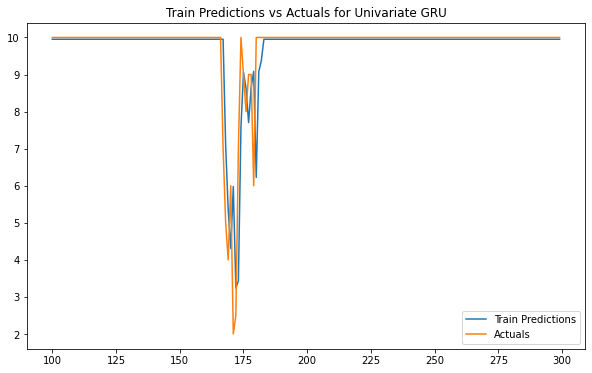

In [59]:
plt.figure(figsize = (10, 6))
plt.plot(train_results_minimize['Train Predictions'])
plt.plot(train_results_minimize['Actuals'])
plt.title('Train Predictions vs Actuals for Univariate GRU')
plt.legend(['Train Predictions', 'Actuals'], loc='lower right')

In [60]:
val_predictions_2 = model4.predict(X_val1).flatten()
val_results_2 = pd.DataFrame(data={'Val Predictions':val_predictions_2, 'Actuals':y_val1})
val_results_2.head(10)

,Val Predictions,Actuals
0,9.951824,10.0
1,9.951824,10.0
2,9.951824,10.0
3,9.951824,10.0
4,9.951824,10.0
5,9.951824,10.0
6,9.951824,10.0
7,9.951824,10.0
8,9.951824,10.0
9,9.951824,10.0


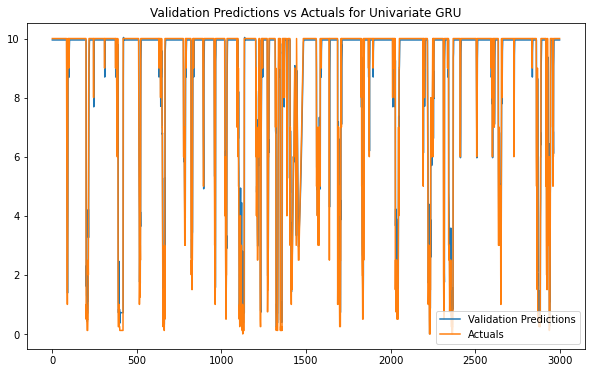

In [61]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_2['Val Predictions'])
plt.plot(val_results_2['Actuals'])
plt.title('Validation Predictions vs Actuals for Univariate GRU')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [62]:
rms = sqrt(mean_squared_error(y_val1, val_predictions_2))
rms

1.047811279992447

To see limited validation result

In [63]:
val_results_minimize = val_results_2[100:300]

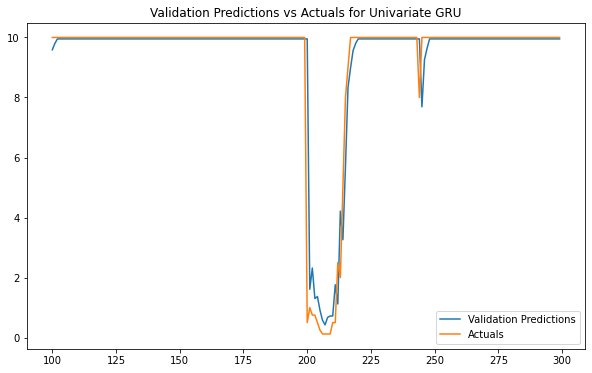

In [64]:
plt.figure(figsize = (10, 6))
plt.plot(val_results_minimize['Val Predictions'])
plt.plot(val_results_minimize['Actuals'])
plt.title('Validation Predictions vs Actuals for Univariate GRU')
plt.legend(['Validation Predictions', 'Actuals'], loc='lower right')

In [65]:
test_predictions_2 = model4.predict(X_test1).flatten()
test_results_2 = pd.DataFrame(data={'Test Predictions':test_predictions_2, 'Actuals':y_test1})
test_results_2.head(10)

,Test Predictions,Actuals
0,9.951824,10.0
1,9.951824,10.0
2,9.951824,10.0
3,9.951824,10.0
4,9.951824,10.0
5,9.951824,10.0
6,9.951824,10.0
7,9.951824,10.0
8,9.951824,10.0
9,9.951824,10.0


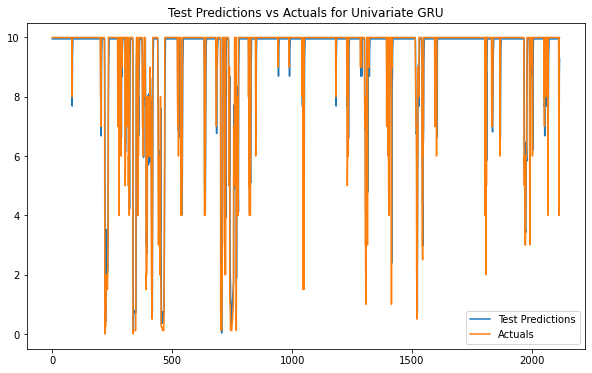

In [66]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_2['Test Predictions'])
plt.plot(test_results_2['Actuals'])
plt.title('Test Predictions vs Actuals for Univariate GRU')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')

In [67]:
rms = sqrt(mean_squared_error(y_test1, test_predictions_2))
rms

1.1679913597483453

To see limited test results

In [68]:
test_results_minimize = test_results_2[100:300]

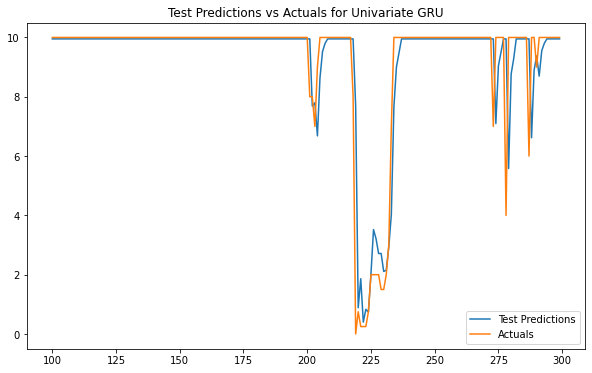

In [69]:
plt.figure(figsize = (10, 6))
plt.plot(test_results_minimize['Test Predictions'])
plt.plot(test_results_minimize['Actuals'])
plt.title('Test Predictions vs Actuals for Univariate GRU')
plt.legend(['Test Predictions', 'Actuals'], loc='lower right')